In [20]:
import glob # For getting file names
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
# import seaborn as sns
# import torch

from collections import Counter
from scipy import stats, cluster
from sklearn.cluster import KMeans

from utils.clustering_utils import *
from utils.conformal_utils import *
from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run

In [11]:
# # iNaturalist - Species level (doesn't run; array is too large (993763, 6414))
# softmax_path = '../class-conditional-conformal-datasets/notebooks/.cache/archived/best-iNaturalist-model-valsoftmax_frac=0.5.npy'
# labels_path = '../class-conditional-conformal-datasets/notebooks/.cache/archived/best-iNaturalist-model-vallabels_frac=0.5.npy'
# save_folder = '.cache/paper/inaturalist'

# iNaturalist - Family level (fewer classes)
softmax_path = '../class-conditional-conformal-datasets/notebooks/.cache/best-iNaturalist-model-valsoftmax_frac=0.5.npy'
labels_path = '../class-conditional-conformal-datasets/notebooks/.cache/best-iNaturalist-model-vallabels_frac=0.5.npy'
save_folder = '.cache/paper/inaturalist'

# SETTINGS
alpha = .1
n_totalcal_list = [10, 30]
score_function_list = ['softmax', 'APS', 'RAPS']
seeds = [0,1,2,3,4,5,6,7,8,9]

In [3]:
%%time

softmax_scores = np.load(softmax_path)
labels = np.load(labels_path) 

print('softmax_scores shape:', softmax_scores.shape) # (1393421, 1103)
cts = Counter(labels).most_common()
print('Class counts:', cts)

softmax_scores shape: (1393421, 1103)
Class counts: [(907, 68838), (175, 32967), (969, 32890), (160, 24086), (163, 23479), (172, 23356), (1048, 21242), (216, 17942), (888, 17333), (872, 15081), (988, 15058), (170, 14503), (962, 14107), (1043, 13782), (350, 13033), (157, 12730), (912, 12041), (577, 11703), (166, 11530), (928, 11288), (347, 10854), (997, 10694), (867, 10176), (914, 10131), (899, 9289), (885, 8934), (210, 8921), (178, 8664), (1009, 8300), (994, 8276), (978, 8245), (879, 8108), (373, 7974), (1020, 7970), (187, 7889), (939, 7639), (370, 7337), (1077, 7309), (973, 7197), (1027, 7081), (929, 7009), (441, 6993), (465, 6782), (982, 6700), (177, 6596), (5, 6280), (476, 6265), (130, 6172), (568, 5975), (220, 5909), (415, 5883), (442, 5860), (423, 5654), (50, 5634), (461, 5459), (1071, 5371), (955, 5342), (964, 5322), (469, 5240), (593, 5240), (377, 5206), (89, 5191), (150, 5172), (1042, 5131), (1017, 4973), (866, 4898), (965, 4812), (119, 4791), (420, 4762), (1068, 4756), (51, 47

(array([  0.,  79., 234., 122.,  55.,  88.,  48.,  33.,  35.,  21.,  29.,
         30.,   8.,  20.,  16.,  11.,   9.,   9.,   6.]),
 array([   0.        ,   52.63157895,  105.26315789,  157.89473684,
         210.52631579,  263.15789474,  315.78947368,  368.42105263,
         421.05263158,  473.68421053,  526.31578947,  578.94736842,
         631.57894737,  684.21052632,  736.84210526,  789.47368421,
         842.10526316,  894.73684211,  947.36842105, 1000.        ]),
 <BarContainer object of 19 artists>)

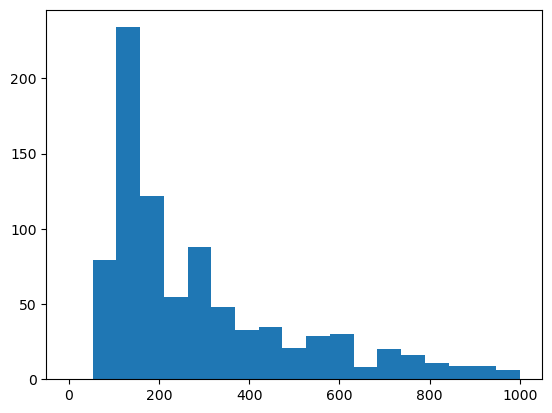

In [4]:
cts_only = np.array([x[1] for x in cts])
plt.hist(cts_only, bins=np.linspace(0,1000,20))

In [5]:
# Number of classes that have more than 200 examples 
np.sum(cts_only > 200)

672

In [12]:
%%time

run_experiment(softmax_scores, labels,
                  save_folder,
                  alpha=alpha,
                  n_totalcal_list=n_totalcal_list,
                  score_function_list = score_function_list,
                  seeds=seeds)

====== score_function=softmax ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [485, 304, 198, 116]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [485, 304, 198, 116]
Saved results to .cache/paper/inaturalist/n_totalcal=10/score=softmax/seed=0_allresults.pkl

seed=1
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [430, 327, 214, 132]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [430, 327, 214, 132]
Saved results to .cache/paper/inaturalist/n_totalcal=10/score=softmax/seed=1_allresults.pkl

seed=2
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [440, 297, 235, 131]
Heuristic chose n_clustering=9, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [440, 297, 235, 131]
Saved results to .

Cluster sizes: [487, 482, 111, 23]
Heuristic chose n_clustering=9, num_clusters=4
p=0.2 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/inaturalist/n_totalcal=10/score=RAPS/seed=4_allresults.pkl

seed=5
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [475, 297, 281, 50]
Heuristic chose n_clustering=9, num_clusters=4
p=0.54 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/inaturalist/n_totalcal=10/score=RAPS/seed=5_allresults.pkl

seed=6
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [486, 484, 121, 12]
Heuristic chose n_clustering=9, num_clusters=4
p=0.2 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/inaturalist/n_totalcal=10/score=RAPS/seed=6_allresults.pkl

seed=7
Heuristic chose n_clustering=9, num_clusters=4
Cluster sizes: [511, 500, 90, 2]
Heuristic chose n_clustering=9, num_clusters=4
p=0.03 for one cluster null hypoth

Heuristic chose n_clustering=28, num_clusters=14
Cluster sizes: [116, 102, 95, 94, 85, 84, 83, 82, 82, 64, 62, 60, 59, 35]
Heuristic chose n_clustering=28, num_clusters=14
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [116, 102, 95, 94, 85, 84, 83, 82, 82, 64, 62, 60, 59, 35]
Saved results to .cache/paper/inaturalist/n_totalcal=30/score=APS/seed=5_allresults.pkl

seed=6
Heuristic chose n_clustering=28, num_clusters=14
Cluster sizes: [121, 120, 108, 93, 86, 85, 84, 82, 80, 68, 64, 46, 37, 29]
Heuristic chose n_clustering=28, num_clusters=14
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [121, 120, 108, 93, 86, 85, 84, 82, 80, 68, 64, 46, 37, 29]
Saved results to .cache/paper/inaturalist/n_totalcal=30/score=APS/seed=6_allresults.pkl

seed=7
Heuristic chose n_clustering=28, num_clusters=14
Cluster sizes: [131, 99, 98, 96, 96, 93, 93, 73, 71, 71, 62, 50, 49, 21]
Heuristic chose n_clustering=28, num_clusters=14
p=0

Saved results to .cache/paper/inaturalist/n_totalcal=30/score=RAPS/seed=6_allresults.pkl

seed=7
Heuristic chose n_clustering=28, num_clusters=14
Cluster sizes: [216, 211, 185, 135, 99, 72, 68, 42, 31, 26, 7, 6, 4, 1]
Heuristic chose n_clustering=28, num_clusters=14
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [216, 211, 185, 135, 99, 72, 68, 42, 31, 26, 7, 6, 4, 1]
Saved results to .cache/paper/inaturalist/n_totalcal=30/score=RAPS/seed=7_allresults.pkl

seed=8
Heuristic chose n_clustering=28, num_clusters=14
Cluster sizes: [235, 174, 161, 143, 133, 81, 61, 51, 27, 18, 10, 6, 2, 1]
Heuristic chose n_clustering=28, num_clusters=14
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [217, 188, 173, 161, 103, 78, 65, 32, 30, 23, 21, 8, 3, 1]
Saved results to .cache/paper/inaturalist/n_totalcal=30/score=RAPS/seed=9_allresults.pkl
CPU times: user 12h 58min 26s, sys: 44min 20s, total: 13h 42min 46s
Wall time: 2h 13min 4

In [ ]:
%%time
# TRY RERUNNING

run_experiment(softmax_scores, labels,
                  save_folder,
                  alpha=alpha,
                  n_totalcal_list=n_totalcal_list,
                  score_function_list = score_function_list,
                  seeds=seeds)

====== score_function=softmax ======
Computing conformal score...

seed=0


In [89]:
for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        print(f'===== n_totalcal={n_totalcal}, score={score} =====')
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        average_results_across_seeds(folder, print_results=False)

===== n_totalcal=10, score=softmax =====
Number of seeds found: 10


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se,marginal_cov_mean,marginal_cov_se
0,standard,5.767872,0.043821,53.394495,1.326315,6.680622,0.124156,0.946609,0.001059
1,classwise,6.672675,0.157921,43.382287,6.934011,18.985864,1.236511,0.904709,0.009573
2,always_cluster,4.640929,0.236943,37.256997,4.692131,6.564205,0.607981,0.927182,0.009225


===== n_totalcal=10, score=APS =====
Number of seeds found: 10


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se,marginal_cov_mean,marginal_cov_se
0,standard,4.684270,0.015260,61.318681,1.588663,13.151043,0.290237,0.930138,0.002080
1,classwise,6.645980,0.211133,43.082441,5.120591,27.114189,1.301729,0.908754,0.007666
2,always_cluster,4.036912,0.272098,45.474305,7.458223,12.531445,0.840266,0.915908,0.008382


===== n_totalcal=10, score=RAPS =====
Number of seeds found: 10


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se,marginal_cov_mean,marginal_cov_se
0,standard,5.539789,0.022748,50.000000,1.310354,7.390987,0.115529,0.942645,0.001879
1,classwise,6.651303,0.210487,42.757164,5.460594,41.182646,3.272216,0.908644,0.008017
2,always_cluster,4.642934,0.144482,43.564830,10.621621,9.787497,2.657746,0.925662,0.006588


===== n_totalcal=30, score=softmax =====
Number of seeds found: 10


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se,marginal_cov_mean,marginal_cov_se
0,standard,5.759740,0.049589,53.534565,2.674387,6.771864,0.086006,0.948342,0.000750
1,classwise,4.379724,0.067573,24.068253,2.372364,8.160410,0.168690,0.903789,0.005025
2,always_cluster,4.078595,0.218045,27.409842,2.661888,6.873414,0.518418,0.924950,0.004693


===== n_totalcal=30, score=APS =====
Number of seeds found: 10


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se,marginal_cov_mean,marginal_cov_se
0,standard,4.755057,0.024477,61.285818,3.317612,13.226553,0.072435,0.931924,0.000514
1,classwise,4.404852,0.073056,23.860136,2.269844,15.234935,0.383150,0.905102,0.005166
2,always_cluster,3.464653,0.196339,23.585994,4.527905,13.072684,0.716134,0.917341,0.005490


===== n_totalcal=30, score=RAPS =====
Number of seeds found: 10


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se,marginal_cov_mean,marginal_cov_se
0,standard,5.586198,0.030168,50.725137,2.866401,7.477019,0.065477,0.945227,0.001032
1,classwise,4.451199,0.085627,24.976343,2.059671,15.176454,0.518972,0.905187,0.005257
2,always_cluster,3.825681,0.129089,25.747779,4.840127,14.290644,2.425705,0.921317,0.005926


In [109]:
# SCRATCH
seed = 4

score='softmax'

with open(f'{save_folder}/n_totalcal={n_totalcal}/score={score}/seed={seed}_allresults.pkl', 'rb') as f:
    results = pickle.load(f)
    
results

{'standard': (0.9904248378425675,
  None,
  {'mean_class_cov_gap': 0.058353024194088804,
   'undercov_gap': 0.08082402668870908,
   'overcov_gap': 0.045495665572225945,
   'max_gap': 0.5404494382022472,
   'marginal_cov': 0.9473885399950454,
   'raw_class_coverages': array([0.8503937 , 0.84615385, 0.8515625 , ..., 0.88717949, 0.83944954,
          0.68253968]),
   'cluster_assignments': None},
  {'mean': 6.661469892254164,
   '[.25, .5, .75, .9] quantiles': array([ 2.,  4., 10., 16.])}),
 'classwise': (array([0.99345381, 0.99718498, 0.99267726, ..., 0.99635219, 0.99816612,
         0.99805072]),
  None,
  {'mean_class_cov_gap': 0.04486957373527121,
   'undercov_gap': 0.04843689481761786,
   'overcov_gap': 0.042652555476470795,
   'max_gap': 0.30000000000000004,
   'marginal_cov': 0.89887240678923,
   'raw_class_coverages': array([0.87401575, 0.88461538, 0.875     , ..., 0.93846154, 0.94036697,
          0.8968254 ]),
   'cluster_assignments': None},
  {'mean': 8.190250755147092,
   '[.

Number of seeds found: 10


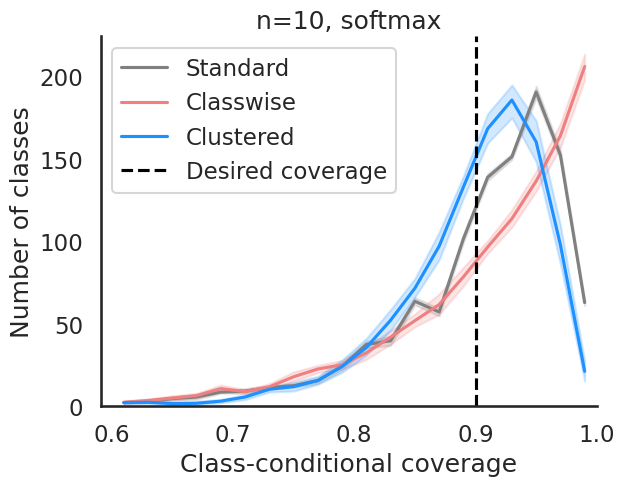

Number of seeds found: 10


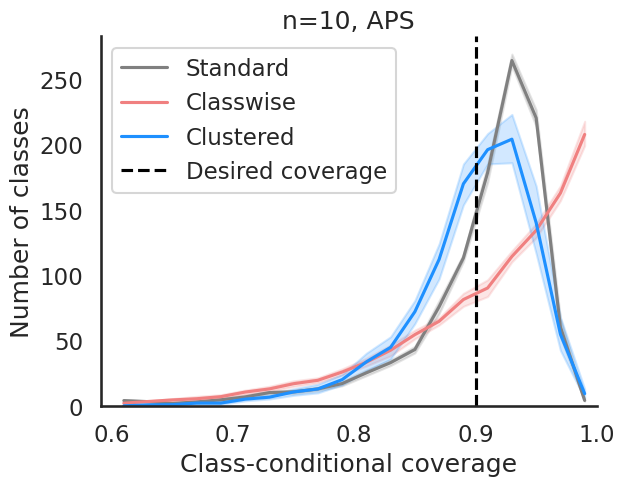

Number of seeds found: 10


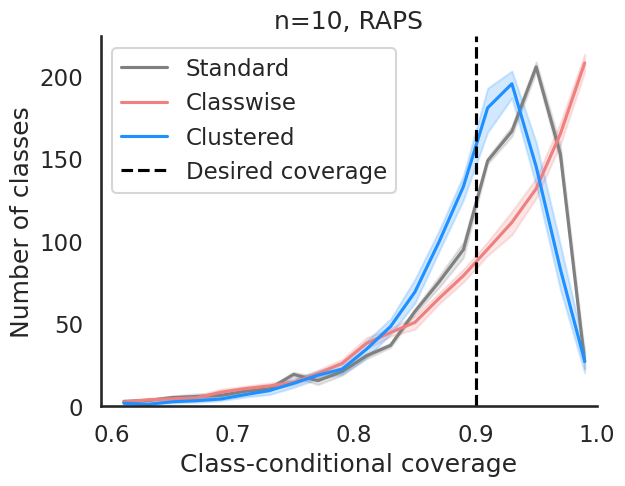

Number of seeds found: 10


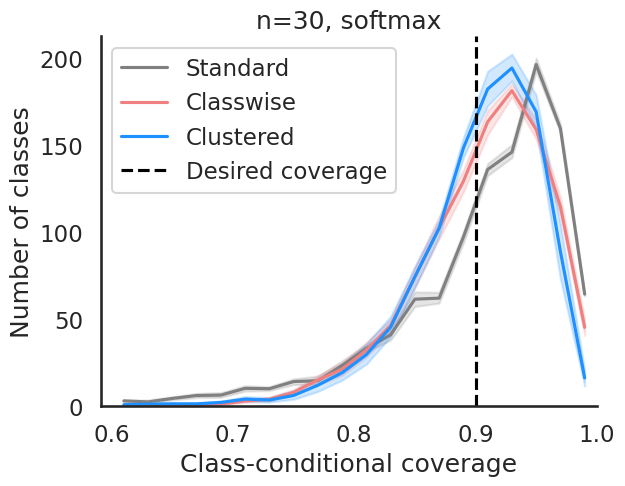

Number of seeds found: 10


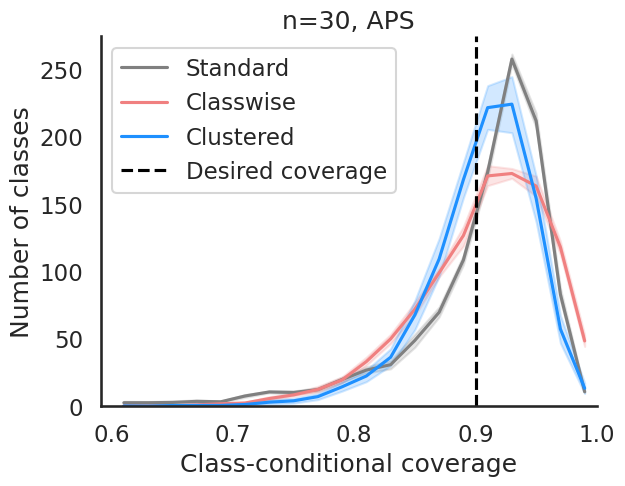

Number of seeds found: 10


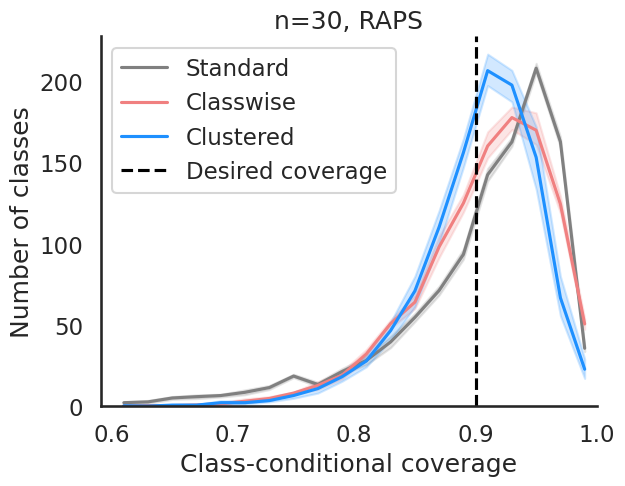

In [87]:
# Plot histograms of class coverage

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=.6, vmax=1, nbins=20, title=f'n={n_totalcal}, {score}')

Number of seeds found: 10


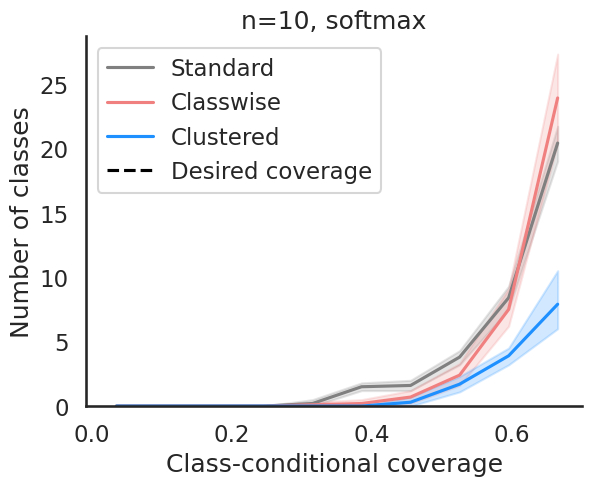

Number of seeds found: 10


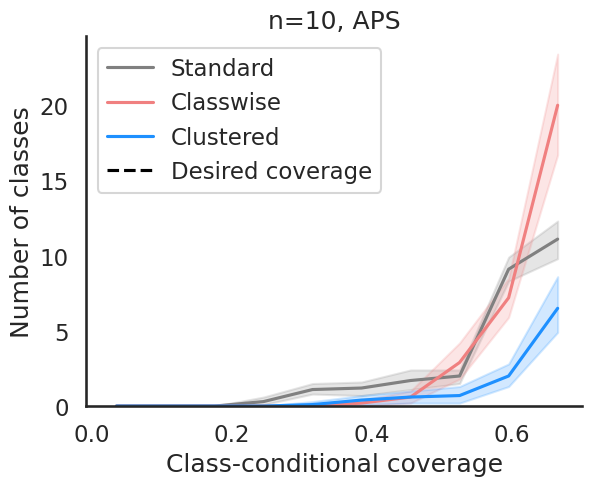

Number of seeds found: 10


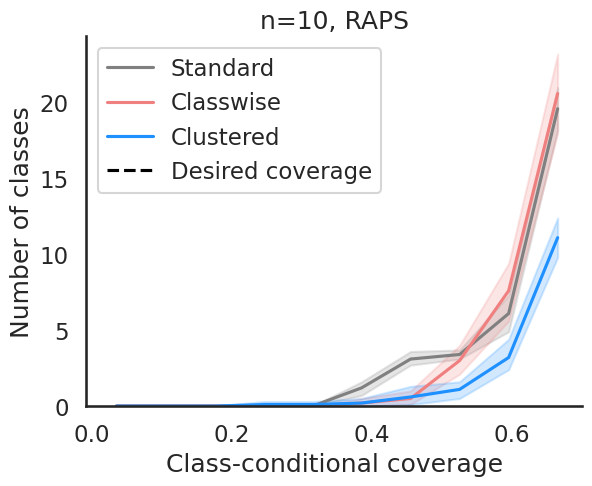

Number of seeds found: 10


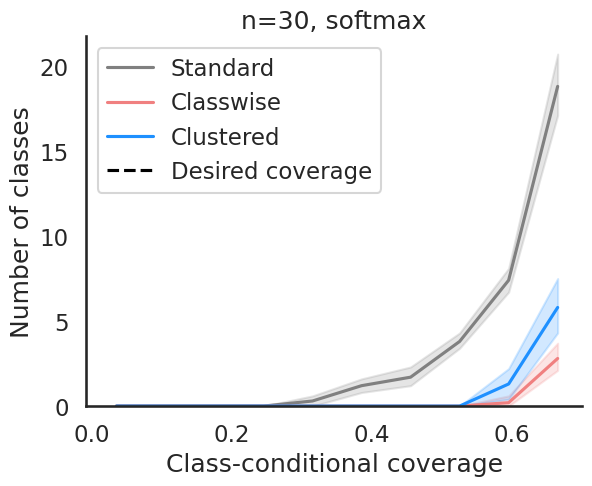

Number of seeds found: 10


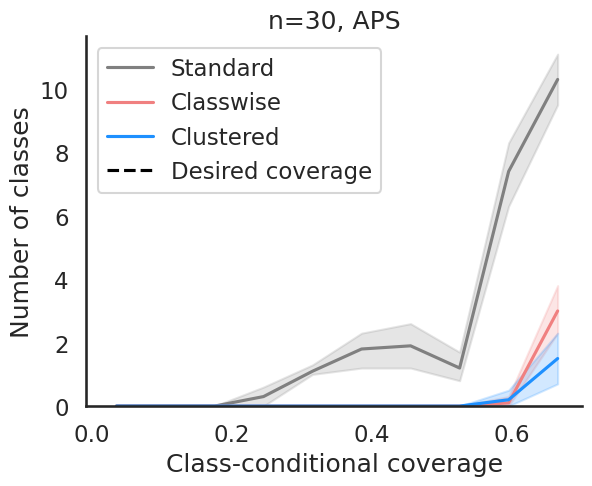

Number of seeds found: 10


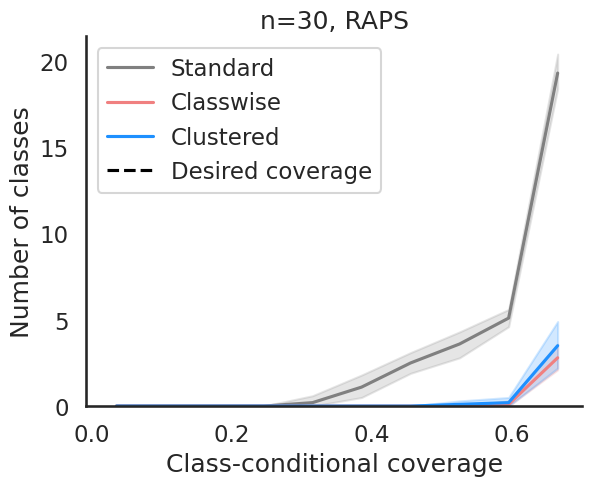

In [88]:
# Plot histograms of class coverage, focus on very undercovered classes

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=0, vmax=.7, nbins=10, title=f'n={n_totalcal}, {score}')